### Fig. 1.2.1. Distribution of survived poetry books
The plot below takes raw bibliographic data as an input, reorganise it and present data as related flows of books detected in Smirdin library catalogues (19th-c.), National Library of Russia (legal deposit library before 1917, modern catalogue) and other modern collections.

#### Data load and preprocessing

In [1]:
library(tidyverse)
library(ggalluvial)
library(MetBrewer)

Warning message:
“pakiet ‘ggplot2’ został zbudowany w wersji R 4.3.1”
Warning message:
“pakiet ‘tidyr’ został zbudowany w wersji R 4.3.1”
Warning message:
“pakiet ‘dplyr’ został zbudowany w wersji R 4.3.1”
Warning message:
“pakiet ‘lubridate’ został zbudowany w wersji R 4.3.1”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# load raw data

biblio <- read_csv("../../data/ch1/01_raw_data_poetry_1830_1850.csv", 
                   col_types = cols(.default = "c")) %>% 
    mutate_all(~na_if(., ""))

# cleaning

biblio <- biblio %>% 
  # filter books which have several editions, while it was not always possible to detect specific editions
  filter(!str_detect(special_tag, "double")|is.na(special_tag)) %>% 
  # merge book id
  mutate(book_id = paste(id, year, poetry_prose, book_type, genre, sep = "_")) %>% 
  # select only needed columns
  select(c(book_id, smirdin_1832:Rosanov)) %>% 
  select(-(contains("price")))

glimpse(biblio)

New names:
• `` -> `...1`


Rows: 1,066
Columns: 18
$ book_id      <chr> "1_1834_v_sep_nar", "2_1834_v_sep_lyr", "4_1834_v_sep_lyr…
$ smirdin_1832 <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ olhin_46     <chr> "5394", NA, NA, NA, NA, NA, NA, NA, "5408", NA, NA, NA, N…
$ krashen_52   <chr> NA, NA, NA, "6119", "15362", "15196", "15987", "16271", "…
$ kymmel_89    <chr> NA, NA, NA, "1240", "567", "569", NA, NA, "1317а", "776",…
$ kymmel_xxiv  <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ MU_1838      <chr> NA, NA, NA, "да", NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ CZ_SLK       <chr> NA, NA, NA, "да", "да", NA, NA, "да", NA, NA, NA, NA, "да…
$ EE_ester     <chr> NA, NA, NA, "да", NA, NA, "да", NA, NA, NA, NA, NA, NA, N…
$ FI_NL        <chr> NA, NA, NA, "да", NA, "да", NA, NA, "да", NA, NA, NA, NA,…
$ LT_VUL       <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ PL_BUW       <chr> NA, NA, NA, "да", NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ PL_BN        <

In [3]:
# put column names as values at all non-NA cells

biblio_s <- biblio %>% 
  mutate_at(vars(smirdin_1832:Rosanov), ~ifelse(!is.na(.), "yes" , . )) %>% 
  # rename some columns
  rename(RU_NLR = RNL,
         RU_RSL = RSL,
         RU_SPU = SPbGU,
         RU_Rosanov = Rosanov)

glimpse(biblio_s)

Rows: 1,066
Columns: 18
$ book_id      <chr> "1_1834_v_sep_nar", "2_1834_v_sep_lyr", "4_1834_v_sep_lyr…
$ smirdin_1832 <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ olhin_46     <chr> "yes", NA, NA, NA, NA, NA, NA, NA, "yes", NA, NA, NA, NA,…
$ krashen_52   <chr> NA, NA, NA, "yes", "yes", "yes", "yes", "yes", "yes", NA,…
$ kymmel_89    <chr> NA, NA, NA, "yes", "yes", "yes", NA, NA, "yes", "yes", NA…
$ kymmel_xxiv  <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ MU_1838      <chr> NA, NA, NA, "yes", NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ CZ_SLK       <chr> NA, NA, NA, "yes", "yes", NA, NA, "yes", NA, NA, NA, NA, …
$ EE_ester     <chr> NA, NA, NA, "yes", NA, NA, "yes", NA, NA, NA, NA, NA, NA,…
$ FI_NL        <chr> NA, NA, NA, "yes", NA, "yes", NA, NA, "yes", NA, NA, NA, …
$ LT_VUL       <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ PL_BUW       <chr> NA, NA, NA, "yes", NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ PL_BN        <

In [4]:
biblio_s <- biblio_s %>% 
    pivot_longer(!book_id, names_to = "holding", values_to = "presence") %>% 
    mutate(presence = if_else(presence == "yes", holding, presence)) %>% 
    pivot_wider(names_from = holding, values_from = presence)

glimpse(biblio_s)

Rows: 1,066
Columns: 18
$ book_id      <chr> "1_1834_v_sep_nar", "2_1834_v_sep_lyr", "4_1834_v_sep_lyr…
$ smirdin_1832 <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ olhin_46     <chr> "olhin_46", NA, NA, NA, NA, NA, NA, NA, "olhin_46", NA, N…
$ krashen_52   <chr> NA, NA, NA, "krashen_52", "krashen_52", "krashen_52", "kr…
$ kymmel_89    <chr> NA, NA, NA, "kymmel_89", "kymmel_89", "kymmel_89", NA, NA…
$ kymmel_xxiv  <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ MU_1838      <chr> NA, NA, NA, "MU_1838", NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ CZ_SLK       <chr> NA, NA, NA, "CZ_SLK", "CZ_SLK", NA, NA, "CZ_SLK", NA, NA,…
$ EE_ester     <chr> NA, NA, NA, "EE_ester", NA, NA, "EE_ester", NA, NA, NA, N…
$ FI_NL        <chr> NA, NA, NA, "FI_NL", NA, "FI_NL", NA, NA, "FI_NL", NA, NA…
$ LT_VUL       <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ PL_BUW       <chr> NA, NA, NA, "PL_BUW", NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ PL_BN        <

In [5]:
# grouping old catalogues as one column var

old_cats <- biblio_s %>% 
  select(c(book_id, smirdin_1832:MU_1838)) %>% 
  pivot_longer(!book_id, 
               names_to = "name", values_to = "old_cat") %>% 
  select(-name) %>% 
  distinct()

head(old_cats)

book_id,old_cat
<chr>,<chr>
1_1834_v_sep_nar,NA
1_1834_v_sep_nar,olhin_46
2_1834_v_sep_lyr,NA
4_1834_v_sep_lyr,NA
5_1834_v_col_lyr,NA
5_1834_v_col_lyr,krashen_52


In [6]:
# grouping new catalogues (except RNL) as one column

new_cats <- biblio_s %>% 
  select(c(book_id, CZ_SLK:RU_Rosanov)) %>% 
  select(-RU_NLR) %>% 
  pivot_longer(!book_id,
               names_to = "name", values_to = "new_cat") %>% 
  select(-name) %>% 
  filter(!is.na(new_cat)) %>% 
  distinct()

head(new_cats)

book_id,new_cat
<chr>,<chr>
1_1834_v_sep_nar,RU_RSL
1_1834_v_sep_nar,RU_Rosanov
5_1834_v_col_lyr,CZ_SLK
5_1834_v_col_lyr,EE_ester
5_1834_v_col_lyr,FI_NL
5_1834_v_col_lyr,PL_BUW


In [7]:
# additional groups for filling colour column ("survival")

# books found only in NLR
only_rnl <- biblio_s %>% 
  select(book_id, RU_NLR) %>% 
  filter(!is.na(RU_NLR)) %>% 
  anti_join(new_cats, by = "book_id") %>% 
  mutate(survived = "Только в РНБ") %>% 
  select(book_id, survived)

# separate table for books not found in any catalogues
lost <- biblio_s %>% 
  anti_join(new_cats, by = "book_id") %>% 
  anti_join(only_rnl, by = "book_id") %>% 
  mutate(survived = "Утеряна") %>% 
  select(book_id, survived)

# books not found in RNL but elsewhere
only_outside <- biblio_s %>% 
  select(book_id, RU_NLR) %>% 
  filter(is.na(RU_NLR)) %>% 
  inner_join(new_cats, by = "book_id") %>% 
  mutate(survived = "Только вне РНБ") %>% 
  select(book_id, survived)

In [8]:
# combine tables & tags
biblio_l <- biblio_s %>% 
  select(book_id, RU_NLR) %>% 
  left_join(old_cats, by = "book_id") %>% 
  left_join(new_cats, by = "book_id") %>% 
  left_join(only_rnl, by = "book_id") %>% 
  left_join(only_outside, by = "book_id") %>% 
  left_join(lost, by = "book_id") %>% 
  mutate(across(everything(), as.character)) 

# replace NAs
biblio_l[is.na(biblio_l)] <- "NA"

biblio_l <- biblio_l %>% 
  mutate(survived = paste(survived.x, survived.y, survived, sep = "_")) %>% 
  mutate(survived.x = str_remove_all(survived, "NA_|_NA")) %>% 
  mutate(survived = ifelse(survived.x == "NA", 
                           "В РНБ и за ее пределами",
                           survived.x)) %>% 
  select(-c(survived.x, survived.y)) %>% 
  group_by(across(c(-book_id))) %>% 
  count(sort = T) %>% 
  ungroup()

head(biblio_l)

Warning message in left_join(., new_cats, by = "book_id"):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”
Warning message in left_join(., only_outside, by = "book_id"):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 811 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


RU_NLR,old_cat,new_cat,survived,n
<chr>,<chr>,<chr>,<chr>,<int>
RU_NLR,NA,RU_RSL,В РНБ и за ее пределами,520
RU_NLR,NA,NA,Только в РНБ,318
RU_NLR,NA,RU_Rosanov,В РНБ и за ее пределами,229
RU_NLR,krashen_52,RU_RSL,В РНБ и за ее пределами,226
RU_NLR,NA,FI_NL,В РНБ и за ее пределами,210
RU_NLR,olhin_46,RU_RSL,В РНБ и за ее пределами,210


#### Alluvial plot

In [9]:
bib_l <- biblio_l %>% 
  # filter books which are known from untrusted sources
  filter(!(old_cat == "NA" & RU_NLR == "NA" & new_cat == "NA")) %>% 
  select(old_cat, RU_NLR, new_cat, survived, n) %>% 
  # change "NA" to different categories
  mutate(old_cat = str_replace_all(old_cat, "NA", " Не найдено"),
         RU_NLR = str_replace_all(RU_NLR, "NA", " Не найдено\nв РНБ"),
         new_cat = str_replace_all(new_cat, "NA", " Не найдено"))
  

# turn data to alluvium long type
biblio_al <- to_lodes_form(bib_l, 
                           key = "Catalogues", 
                           axes = 1:3)
head(biblio_al)

survived,n,alluvium,Catalogues,stratum
<chr>,<int>,<int>,<fct>,<fct>
В РНБ и за ее пределами,520,1,old_cat,Не найдено
Только в РНБ,318,2,old_cat,Не найдено
В РНБ и за ее пределами,229,3,old_cat,Не найдено
В РНБ и за ее пределами,226,4,old_cat,krashen_52
В РНБ и за ее пределами,210,5,old_cat,Не найдено
В РНБ и за ее пределами,210,6,old_cat,olhin_46


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Каталоги 19-го в.' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Каталоги 19-го в.' w 'mbcsToSbcs': kropka zastąpiona <9a>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Каталоги 19-го в.' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Каталоги 19-го в.' w 'mbcsToSbcs': kropka zastąpiona <b0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Каталоги 19-го в.' w 'mbcsToSbcs': kropka zastąpiona <d1>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Каталоги 19-го в.' w 'mbcsToSbcs': kropka zastąpiona <82>

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '(держатель обязательных экз.)' w 'mbcsToSbcs': kropka zastąpiona <b1>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '(держатель обязательных экз.)' w 'mbcsToSbcs': kropka zastąpiona <d1>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '(держатель обязательных экз.)' w 'mbcsToSbcs': kropka zastąpiona <8f>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '(держатель обязательных экз.)' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '(держатель обязательных экз.)' w 'mbcsToSbcs': kropka zastąpiona <b7>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersj

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'библиотеки' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'библиотеки' w 'mbcsToSbcs': kropka zastąpiona <be>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'библиотеки' w 'mbcsToSbcs': kropka zastąpiona <d1>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'библиотеки' w 'mbcsToSbcs': kropka zastąpiona <82>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'библиотеки' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'библиотеки' w 'mbcsToSbcs': kropka zastąpiona <b5>”
Warning message in grid.Call(C_textBound

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Только в РНБ' w 'mbcsToSbcs': kropka zastąpiona <be>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Только в РНБ' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Только в РНБ' w 'mbcsToSbcs': kropka zastąpiona <bb>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Только в РНБ' w 'mbcsToSbcs': kropka zastąpiona <d1>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Только в РНБ' w 'mbcsToSbcs': kropka zastąpiona <8c>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Только в РНБ' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Утеряна' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Утеряна' w 'mbcsToSbcs': kropka zastąpiona <bd>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Утеряна' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Утеряна' w 'mbcsToSbcs': kropka zastąpiona <b0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В РНБ и за ее пределами' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В РНБ и за ее пределами' w 'mbcsToSbcs': kropka zastąpiona <92>”
Warning message in grid.Ca

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Только в РНБ' w 'mbcsToSbcs': kropka zastąpiona <ba>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Только в РНБ' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Только в РНБ' w 'mbcsToSbcs': kropka zastąpiona <be>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Только в РНБ' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Только в РНБ' w 'mbcsToSbcs': kropka zastąpiona <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Только в РНБ' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Книга найдена:' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Книга найдена:' w 'mbcsToSbcs': kropka zastąpiona <bd>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Книга найдена:' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Книга найдена:' w 'mbcsToSbcs': kropka zastąpiona <b8>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Книга найдена:' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Книга найдена:' w 'mbcsToSbcs': kropka zastąpiona <b3>”
Warning message 

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '1889 Киммель' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '1889 Киммель' w 'mbcsToSbcs': kropka zastąpiona <bc>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '1889 Киммель' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '1889 Киммель' w 'mbcsToSbcs': kropka zastąpiona <bc>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '1889 Киммель' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '1889 Киммель' w 'mbcsToSbcs': kropka zastąpiona <b5>”
Warning me

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '1852 Крашенин.' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '1852 Крашенин.' w 'mbcsToSbcs': kropka zastąpiona <bd>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '1852 Крашенин.' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '1852 Крашенин.' w 'mbcsToSbcs': kropka zastąpiona <b8>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '1852 Крашенин.' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '1852 Крашенин.' w 'mbcsToSbcs': kropka zastąpiona <bd>

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '1832 Смирдин' w 'mbcsToSbcs': kropka zastąpiona <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '1832 Смирдин' w 'mbcsToSbcs': kropka zastąpiona <80>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '1832 Смирдин' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '1832 Смирдин' w 'mbcsToSbcs': kropka zastąpiona <b4>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '1832 Смирдин' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '1832 Смирдин' w 'mbcsToSbcs': kropka zastąpiona <b8>”
Warning me

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji ' Не найдено' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji ' Не найдено' w 'mbcsToSbcs': kropka zastąpiona <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji ' Не найдено' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji ' Не найдено' w 'mbcsToSbcs': kropka zastąpiona <b9>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji ' Не найдено' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji ' Не найдено' w 'mbcsToSbcs': kropka zastąpiona <b4>”
Warning message 

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji ' Не найдено' w 'mbcsToSbcs': kropka zastąpiona <bd>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji ' Не найдено' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji ' Не найдено' w 'mbcsToSbcs': kropka zastąpiona <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji ' Не найдено' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji ' Не найдено' w 'mbcsToSbcs': kropka zastąpiona <b9>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji ' Не найдено' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message 

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Каталоги 19-го в.' w 'mbcsToSbcs': kropka zastąpiona <be>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Каталоги 19-го в.' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Каталоги 19-го в.' w 'mbcsToSbcs': kropka zastąpiona <b2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'РНБ' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'РНБ' w 'mbcsToSbcs': kropka zastąpiona <a0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'РНБ' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in gri

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '(держатель обязательных экз.)' w 'mbcsToSbcs': kropka zastąpiona <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '(держатель обязательных экз.)' w 'mbcsToSbcs': kropka zastąpiona <8b>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '(держатель обязательных экз.)' w 'mbcsToSbcs': kropka zastąpiona <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '(держатель обязательных экз.)' w 'mbcsToSbcs': kropka zastąpiona <85>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '(держатель обязательных экз.)' w 'mbcsToSbcs': kropka zastąpiona <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niep

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Книга найдена:' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Книга найдена:' w 'mbcsToSbcs': kropka zastąpiona <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Книга найдена:' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Книга найдена:' w 'mbcsToSbcs': kropka zastąpiona <bd>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Книга найдена:' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Книга найдена:' w 'mbcsToSbcs': kropka zastąpiona <b0>

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В РНБ и за ее пределами' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В РНБ и за ее пределами' w 'mbcsToSbcs': kropka zastąpiona <bc>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В РНБ и за ее пределами' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В РНБ и за ее пределами' w 'mbcsToSbcs': kropka zastąpiona <b8>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Только в РНБ' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Только в РНБ' w 'mbc

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Утеряна' w 'mbcsToSbcs': kropka zastąpiona <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Утеряна' w 'mbcsToSbcs': kropka zastąpiona <82>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Утеряна' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Утеряна' w 'mbcsToSbcs': kropka zastąpiona <b5>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Утеряна' w 'mbcsToSbcs': kropka zastąpiona <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Утеряна' w 'mbcsToSbcs': kropka zastąpiona <80>”
Warning message in grid.Call.graphics(C_

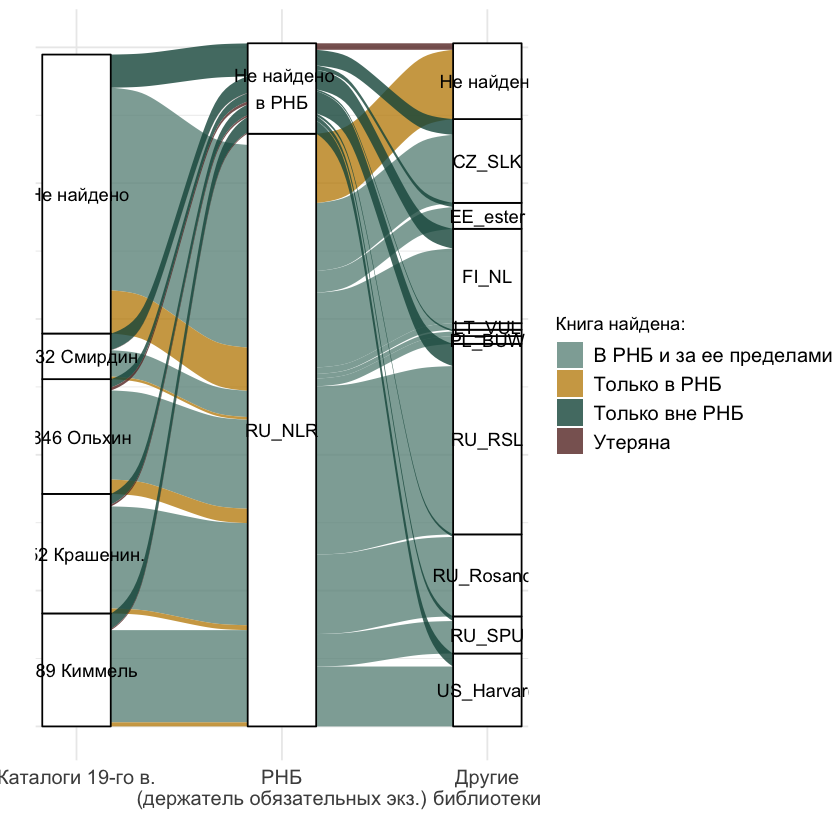

In [28]:
# Plot

biblio_al %>% 
  # rename stratum for prettier lables
  mutate(stratum = str_replace_all(stratum, "olhin_46", "1846 Ольхин")) %>% 
  mutate(stratum = str_replace_all(stratum, "krashen_52", "1852 Крашенин.")) %>% 
  mutate(stratum = str_replace_all(stratum, "kymmel_89", "1889 Киммель")) %>% 
  mutate(stratum = str_replace_all(stratum, "smirdin_1832", "1832 Смирдин")) %>% 
  # remove additional catalogues
  filter(stratum != "MU_1838" & stratum != "kymmel_xxiv") %>% 
  ggplot(aes(x = Catalogues,
             stratum = stratum,
             alluvium = alluvium,
             y = n,
             label = stratum)) +
  geom_flow(aes(fill = survived), 
            alpha = 0.8) +
  geom_stratum() + 
  geom_text(stat = "stratum", check_overlap = T) + 
  labs(x = "", y = "", fill = "Книга найдена:") + 
  theme_minimal() + 
  scale_fill_manual(values = c(
      met.brewer("Veronese")[4], met.brewer("Veronese")[3],
      met.brewer("Veronese")[6], met.brewer("Veronese")[1]
    )) + 
  scale_x_discrete(labels = c("Каталоги 19-го в.", 
                              "РНБ\n(держатель обязательных экз.)", 
                              "Другие\nбиблиотеки"),
                   expand = c(0.1,0)) + 
  theme(axis.text.y = element_blank(),
        legend.text = element_text(size = 12),
        #legend.position = "bottom",
        axis.text.x = element_text(size = 12))


In [30]:
ggsave("plots/Fig_1-2-1.jpeg", plot = last_plot(), height = 8, width = 12, bg = "white",
      dpi = 300)

Plot in black & white

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Каталоги 19-го в.' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Каталоги 19-го в.' w 'mbcsToSbcs': kropka zastąpiona <9a>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Каталоги 19-го в.' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Каталоги 19-го в.' w 'mbcsToSbcs': kropka zastąpiona <b0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Каталоги 19-го в.' w 'mbcsToSbcs': kropka zastąpiona <d1>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Каталоги 19-го в.' w 'mbcsToSbcs': kropka zastąpiona <82>

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '(держатель обязательных экз.)' w 'mbcsToSbcs': kropka zastąpiona <b1>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '(держатель обязательных экз.)' w 'mbcsToSbcs': kropka zastąpiona <d1>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '(держатель обязательных экз.)' w 'mbcsToSbcs': kropka zastąpiona <8f>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '(держатель обязательных экз.)' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '(держатель обязательных экз.)' w 'mbcsToSbcs': kropka zastąpiona <b7>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersj

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'библиотеки' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'библиотеки' w 'mbcsToSbcs': kropka zastąpiona <be>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'библиотеки' w 'mbcsToSbcs': kropka zastąpiona <d1>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'библиотеки' w 'mbcsToSbcs': kropka zastąpiona <82>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'библиотеки' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'библиотеки' w 'mbcsToSbcs': kropka zastąpiona <b5>”
Warning message in grid.Call(C_textBound

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Только в РНБ' w 'mbcsToSbcs': kropka zastąpiona <be>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Только в РНБ' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Только в РНБ' w 'mbcsToSbcs': kropka zastąpiona <bb>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Только в РНБ' w 'mbcsToSbcs': kropka zastąpiona <d1>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Только в РНБ' w 'mbcsToSbcs': kropka zastąpiona <8c>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Только в РНБ' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Утеряна' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Утеряна' w 'mbcsToSbcs': kropka zastąpiona <bd>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Утеряна' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Утеряна' w 'mbcsToSbcs': kropka zastąpiona <b0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В РНБ и за ее пределами' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В РНБ и за ее пределами' w 'mbcsToSbcs': kropka zastąpiona <92>”
Warning message in grid.Ca

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Только в РНБ' w 'mbcsToSbcs': kropka zastąpiona <ba>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Только в РНБ' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Только в РНБ' w 'mbcsToSbcs': kropka zastąpiona <be>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Только в РНБ' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Только в РНБ' w 'mbcsToSbcs': kropka zastąpiona <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Только в РНБ' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Книга найдена:' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Книга найдена:' w 'mbcsToSbcs': kropka zastąpiona <bd>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Книга найдена:' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Книга найдена:' w 'mbcsToSbcs': kropka zastąpiona <b8>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Книга найдена:' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Книга найдена:' w 'mbcsToSbcs': kropka zastąpiona <b3>”
Warning message 

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '1889 Киммель' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '1889 Киммель' w 'mbcsToSbcs': kropka zastąpiona <bc>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '1889 Киммель' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '1889 Киммель' w 'mbcsToSbcs': kropka zastąpiona <bc>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '1889 Киммель' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '1889 Киммель' w 'mbcsToSbcs': kropka zastąpiona <b5>”
Warning me

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '1852 Крашенин.' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '1852 Крашенин.' w 'mbcsToSbcs': kropka zastąpiona <bd>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '1852 Крашенин.' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '1852 Крашенин.' w 'mbcsToSbcs': kropka zastąpiona <b8>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '1852 Крашенин.' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '1852 Крашенин.' w 'mbcsToSbcs': kropka zastąpiona <bd>

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '1832 Смирдин' w 'mbcsToSbcs': kropka zastąpiona <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '1832 Смирдин' w 'mbcsToSbcs': kropka zastąpiona <80>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '1832 Смирдин' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '1832 Смирдин' w 'mbcsToSbcs': kropka zastąpiona <b4>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '1832 Смирдин' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '1832 Смирдин' w 'mbcsToSbcs': kropka zastąpiona <b8>”
Warning me

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji ' Не найдено' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji ' Не найдено' w 'mbcsToSbcs': kropka zastąpiona <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji ' Не найдено' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji ' Не найдено' w 'mbcsToSbcs': kropka zastąpiona <b9>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji ' Не найдено' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji ' Не найдено' w 'mbcsToSbcs': kropka zastąpiona <b4>”
Warning message 

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji ' Не найдено' w 'mbcsToSbcs': kropka zastąpiona <bd>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji ' Не найдено' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji ' Не найдено' w 'mbcsToSbcs': kropka zastąpiona <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji ' Не найдено' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji ' Не найдено' w 'mbcsToSbcs': kropka zastąpiona <b9>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji ' Не найдено' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message 

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Каталоги 19-го в.' w 'mbcsToSbcs': kropka zastąpiona <be>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Каталоги 19-го в.' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Каталоги 19-го в.' w 'mbcsToSbcs': kropka zastąpiona <b2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'РНБ' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'РНБ' w 'mbcsToSbcs': kropka zastąpiona <a0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'РНБ' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in gri

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '(держатель обязательных экз.)' w 'mbcsToSbcs': kropka zastąpiona <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '(держатель обязательных экз.)' w 'mbcsToSbcs': kropka zastąpiona <8b>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '(держатель обязательных экз.)' w 'mbcsToSbcs': kropka zastąpiona <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '(держатель обязательных экз.)' w 'mbcsToSbcs': kropka zastąpiona <85>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji '(держатель обязательных экз.)' w 'mbcsToSbcs': kropka zastąpiona <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niep

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Книга найдена:' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Книга найдена:' w 'mbcsToSbcs': kropka zastąpiona <b0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Книга найдена:' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Книга найдена:' w 'mbcsToSbcs': kropka zastąpiona <bd>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Книга найдена:' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Книга найдена:' w 'mbcsToSbcs': kropka zastąpiona <b0>

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В РНБ и за ее пределами' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В РНБ и за ее пределами' w 'mbcsToSbcs': kropka zastąpiona <bc>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В РНБ и за ее пределами' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'В РНБ и за ее пределами' w 'mbcsToSbcs': kropka zastąpiona <b8>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Только в РНБ' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Только в РНБ' w 'mbc

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Утеряна' w 'mbcsToSbcs': kropka zastąpiona <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Утеряна' w 'mbcsToSbcs': kropka zastąpiona <82>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Утеряна' w 'mbcsToSbcs': kropka zastąpiona <d0>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Утеряна' w 'mbcsToSbcs': kropka zastąpiona <b5>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Утеряна' w 'mbcsToSbcs': kropka zastąpiona <d1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“niepowodzenie konwersji 'Утеряна' w 'mbcsToSbcs': kropka zastąpiona <80>”
Warning message in grid.Call.graphics(C_

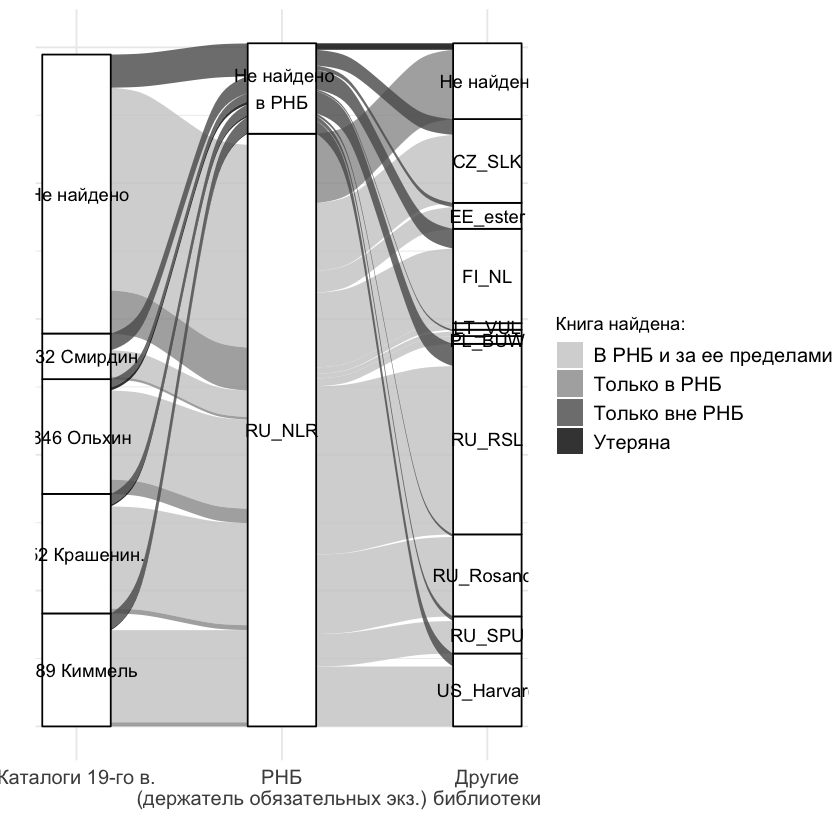

In [27]:
biblio_al %>% 
  # rename stratum for prettier lables
  mutate(stratum = str_replace_all(stratum, "olhin_46", "1846 Ольхин")) %>% 
  mutate(stratum = str_replace_all(stratum, "krashen_52", "1852 Крашенин.")) %>% 
  mutate(stratum = str_replace_all(stratum, "kymmel_89", "1889 Киммель")) %>% 
  mutate(stratum = str_replace_all(stratum, "smirdin_1832", "1832 Смирдин")) %>% 
  # remove additional catalogues
  filter(stratum != "MU_1838" & stratum != "kymmel_xxiv") %>% 
  ggplot(aes(x = Catalogues,
             stratum = stratum,
             alluvium = alluvium,
             y = n,
             label = stratum)) +
  geom_flow(aes(fill = survived), 
            alpha = 0.8) +
  geom_stratum() + 
  geom_text(stat = "stratum", check_overlap = T) + 
  labs(x = "", y = "", fill = "Книга найдена:") + 
  theme_minimal() + 
  scale_fill_manual(values = c(
      "gray80", "gray60", "gray35", "black"
    )) + 
  scale_x_discrete(labels = c("Каталоги 19-го в.", 
                              "РНБ\n(держатель обязательных экз.)", 
                              "Другие\nбиблиотеки"),
                   expand = c(0.1,0)) + 
  theme(axis.text.y = element_blank(),
        legend.text = element_text(size = 12),
        #legend.position = "bottom",
        axis.text.x = element_text(size = 12))


In [28]:
ggsave("plots/bw/Fig_1-2-1.jpeg", plot = last_plot(), height = 8, width = 12, bg = "white",
      dpi = 300)